# Lab 4: Basics of evaluating predictive performance

- **Author:** Prof. Mu-Jeung Yang
- **Version:** September 2018
- **Course:** OAMO 3040: Business Econometrics II

### Learning Objectives:
By the end of the lab, you will be able to:
* run both linear regressions and Logit regressions in Python
* generate train-test splits, either using Python's random number generator or scikit-learn
* identify measures for evaluating regression performance

### References: 
* [Sci-kit Learn](http://scikit-learn.org)
* [Sci-kit Learn: Training-Test sample splits](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* [Introduction to Statistical Learning, Lab #5](http://www-bcf.usc.edu/~gareth/ISL/Chapter%205%20Lab.txt)

## 0. Load libraries and data

In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
auto_df = pd.read_csv('data/Auto.csv')

## 1. Splitting data into training and test sets

### 1.1 Splitting "by hand" (with random number generator)

Our goal here is to split the data randomly into a training and test dataset. For this purpose, let's start by assigning each observation a random number, using the rand command and saving the result to the DataFrame auto_df:

In [3]:
auto_df['rand'] = auto_df.apply(lambda row: random.random(), axis=1)

In [4]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,rand
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0.738474
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0.967729
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0.282941
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0.138548
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0.896675


In [5]:
auto_df['train'] = (auto_df['rand']>.33)

In [6]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,rand,train
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0.738474,True
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0.967729,True
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0.282941,False
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0.138548,False
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0.896675,True


In [7]:
len(auto_df)

397

In [8]:
len(auto_df[auto_df['train']])

262

### 1.2 Using Scikit-Learn

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = auto_df[['weight', 'displacement']]

In [11]:
y = auto_df['mpg']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
len(X_train)

265

In [14]:
len(y_train)

265

In [15]:
len(X_test)

132

In [16]:
len(y_test)

132

## 2. Regressions using Scikit Learn

We learned how to run regressions with the statsmodels library last time. This time we will use the more versatile library scikit learn:

Reference: http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

In [17]:
from sklearn import linear_model

In [18]:
lm = linear_model.LinearRegression()

In [19]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lm.coef_

array([-0.00639139, -0.01238739])

### 2.1 Regressions on the full data

Before we continue, let's first remind outselves how to run things with statsmodels: 
#### <font color='blue'>EXCERCISE 1:</font> Statsmodel benchmark
<font color='blue'>Load necessary libraries and run the following linear regression model: mpg on weight and displacement. Run this regression on the full data (including training and test sets)</font>

In [21]:
#Enter code
import statsmodels.formula.api as smf

In [22]:
mpg_mod = smf.ols(formula="mpg ~ weight + displacement", data=auto_df)
mpg_results = mpg_mod.fit()
print(mpg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     455.3
Date:                Wed, 18 Sep 2019   Prob (F-statistic):          3.64e-103
Time:                        21:01:08   Log-Likelihood:                -1141.9
No. Observations:                 397   AIC:                             2290.
Df Residuals:                     394   BIC:                             2302.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       43.8910      1.162     37.785   

#### Comparison: running the same regression in scikit learn:

To run the same regression (on the full data) in scikit learn, we need to specify datasets that include target (dependent) and attribute (regressor, independent, predictor) variables. To do this, we can simply type:

In [23]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
pd.DataFrame( list(zip(X, lm.coef_)), columns=['regressor', 'coeff.'])

,regressor,coeff.
0,weight,-0.005789
1,displacement,-0.016433


### 2.2 Predictive model evaluation in scikit-learn

The following two lines conduct an "out of sample" regression we need for model evaluation:

In [25]:
#Step 1: estimate model on training data
lm.fit(X_train, y_train)

#Step 2: use estimated model to predict values of the target variable in the test data
y_pred = lm.predict(X_test)
# Now the out of sample predictions are saved as y_pred

#### Graphical approach to model evaluation

We start out with obtaining a graph that will give us an informal impression of the quality of our prediction. For this purpose, let's load the matplotlib library first:

In [26]:
%matplotlib inline  
import matplotlib.pyplot as plt  

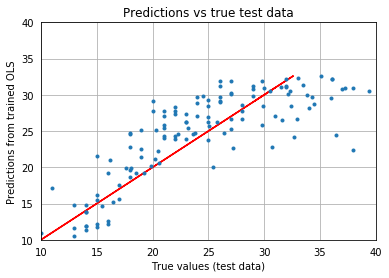

In [27]:
fig, ax = plt.subplots()
ax.plot(y_pred, y_pred, color = 'red')
ax.plot(y_test, y_pred , '.')
ax.axis([10, 40, 10, 40])
ax.set_ylabel("Predictions from trained OLS")
ax.set_xlabel("True values (test data)")
ax.set_title("Predictions vs true test data")
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.set_xlim(10,40)
ax.grid(True) # Add grid by setting to True
plt.show()

#### Formal out-of-sample model evaluation statistics

In [28]:
print("Out-of-sample R-squared:", lm.score(X_test, y_test))

Out-of-sample R-squared: 0.6404305376121477


In [29]:
MSE_OOS = np.mean((y_test - y_pred)**2)
print("Out-of-sample MSE:", MSE_OOS)

Out-of-sample MSE: 21.62854808443883


#### <font color='blue'>EXCERCISE 2:</font> Predictive model evaluation for linear regression

Here you are asked to explore how adding some non-linear terms might improve our prediction of fuel efficiency. 

<font color='blue'> a) Add to the dataframe auto_df two variables, which are the squared values of weight and displacement. Call these variables "weight_sq" and "displacement_sq" (Hint: you might want to check how to add variables to a DataFrame in lab 2. But instead of using no.where, you might want to use np.power.) After you added these variables, display the auto_df.head to verify that you correctly added them.</font>

In [30]:
#Enter code
auto_df['weight_sq'] = np.power(auto_df['weight'], 2)
auto_df['displacement_sq'] = np.power(auto_df['displacement'], 2)
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,rand,train,weight_sq,displacement_sq
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0.738474,True,12278016,94249.0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0.967729,True,13638249,122500.0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0.282941,False,11806096,101124.0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0.138548,False,11785489,92416.0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0.896675,True,11895601,91204.0


<font color='blue'> b) Following the steps in section 1.2, prepare a training and test dataset, with weight, displacement and the squares of weight and displacement as predictor variables. Set aside 33 percent of the data as test data and use the rest as training data. Set the same random seed as I did under section 1.2. For purposes of comparability, do not forget to set random_state=42 </font>

In [31]:
#Enter code
X1 = auto_df[['weight', 'displacement', 'weight_sq', 'displacement_sq']]
y1 = auto_df['mpg']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=.33, random_state=42)

<font color='blue'> c) Estimate a linear regression of fuel efficiency on weight, weight-squared, displacement and displacement-squared and display the estimated coefficients. How have the estimates of the previously used regressors weight and displacement changed?</font>

In [32]:
#Enter code
lm_mpg = linear_model.LinearRegression()
lm_mpg.fit(X_train1, y_train1)
pd.DataFrame(list(zip(X1, lm_mpg.coef_)), columns=['regressors', 'coefficients'])

,regressors,coefficients
0,weight,-0.019459
1,displacement,-0.008295
2,weight_sq,0.000002
3,displacement_sq,-0.000009


The weight coeeficient increased in magnitude while the displacement variable decreased in magnitude.

<font color='blue'> d) Perform an out-of-sample prediction and call it y_pred1. What are the values for out-of-sample R-squared and out-of-sample MSE (mean-squared-error)? How do they compare to the model we trained in section 2.2? Explain the differences.</font>

In [33]:
#Enter code
y_pred1 = lm_mpg.predict(X_test1)
print('Out-of-sample R-squared:', lm_mpg.score(X_test1, y_test1))
MSE = np.mean((y_test1 - y_pred1)**2)
print("Out-of-sample MSE:", MSE)

Out-of-sample R-squared: 0.6536250255770106
Out-of-sample MSE: 20.834883306839444


We increased our R-squared and decreased our MSE when including the squared variables so we are happy.

<font color='blue'> e) Provide a comparison plot of predicted fuel efficiency vs true fuel efficiency in the test data and discuss in the context of this graph what might explain the changes in predictive performance you documented under 2c).</font>

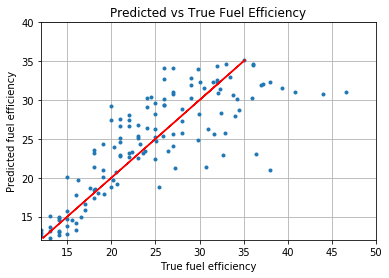

In [34]:
#Enter code
fig, ax = plt.subplots()
ax.plot(y_test1, y_pred1, '.')
ax.plot(y_pred1, y_pred1, color='red')
ax.axis([12, 50, 12, 40])
ax.set_xlabel('True fuel efficiency')
ax.set_ylabel('Predicted fuel efficiency')
ax.set_title('Predicted vs True Fuel Efficiency')
ax.grid()
plt.show()

By adding our squared variables our scatter plot follows more of a linear trend rather than a quadratic trend like in our earlier graph. Adding a square variable takes into account the rate of change of the slope of the root variable so it allows us to better predict how much mpg will change as weight and displacement continue to increase.

<font color='blue'> f) Provide a comparison plot of predictions from the linear prediction model of fuel efficiency in 2.2 compared to your non-linear fuel efficiency prediction model in exercise 2. For clarity, provide a 45-degree line that benchmarks if predictions for the test data are identical. In the context of this graph, discuss how the predictions differ. </font>

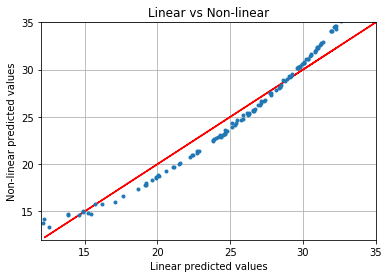

In [35]:
#Enter code
fig, ax = plt.subplots()
ax.plot(y_pred1, y_pred1, color='red')
ax.plot(y_pred, y_pred1, '.')
ax.axis([12, 35, 12, 35])
ax.set_xlabel('Linear predicted values')
ax.set_ylabel('Non-linear predicted values')
ax.set_title('Linear vs Non-linear')
ax.grid()
plt.show()


The curve shows the difference between the predicted values of each test set. If the predicted values were the same we would not have a curve in the data points like we see above. It would just be a straight line.